In [51]:
!pip install pandas_profiling
!pip install sweetviz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Salary_Data.csv')

In [4]:
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
data.tail()

,YearsExperience,Salary
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [7]:
data.shape

(30, 2)

In [8]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [52]:
data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [53]:
data[data.duplicated()].shape

(0, 2)

In [11]:
data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

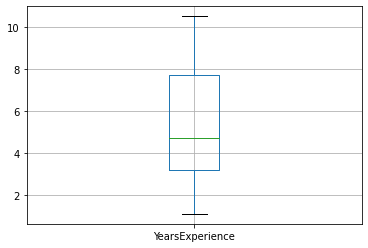

In [12]:
data.boxplot(['YearsExperience'])

<AxesSubplot:>

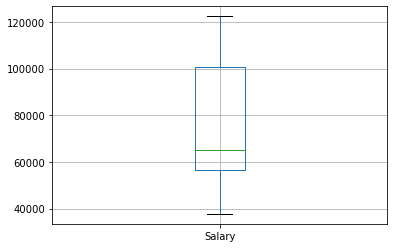

In [22]:
data.boxplot(['Salary'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Salary', ylabel='Density'>

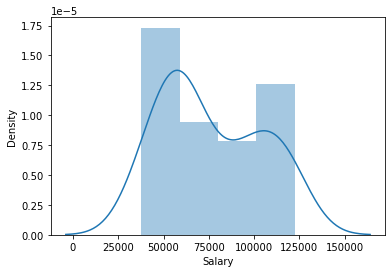

In [15]:
import seaborn as sns
sns.distplot(data['Salary'])

C:\Users\sharu\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

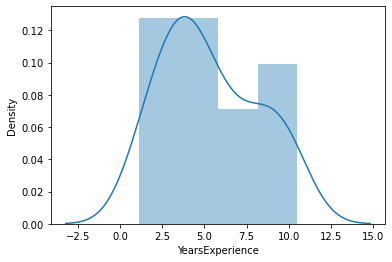

In [16]:
import seaborn as sns
sns.distplot(data['YearsExperience'])

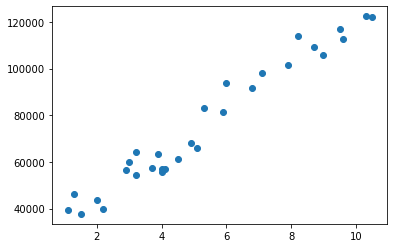

In [31]:
plt.scatter(data.YearsExperience,data.Salary)

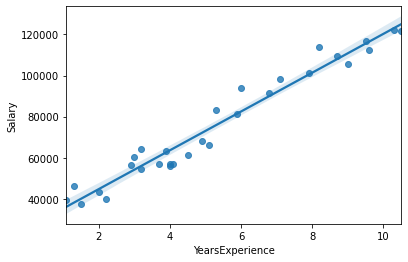

In [32]:
import statsmodels.formula.api as smf
model = smf.ols("Salary~YearsExperience",data = data).fit()
sns.regplot (x="YearsExperience", y="Salary", data=data);

In [33]:
#Coefficients
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [34]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)    

Intercept          11.346940
YearsExperience    24.950094
dtype: float64 
 Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64


In [39]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9569566641435086, 0.9554194021486339)

Predict for new data point

In [48]:
#Predict for 4 and 6  YearofExperience circulation
newdata=pd.Series([4,6])

In [49]:
data_pred=pd.DataFrame(newdata,columns=['YearsExperience'])

In [50]:
model.predict(data_pred)

0    63592.049484
1    82491.974127
dtype: float64